In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
from torch.utils.data import DataLoader,random_split
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import fastai
import fastai.tabular
from fastai.vision.all import *
from fastai.data.core import DataLoaders
from CNN import *
import random, os, h5py, json

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

with open("data_config.json", "r") as outfile:
    data = json.load(outfile, strict=False)
    
extent = list(data['extent'])
data_numpy = np.load('data.npy')
num_sim, batch_size, split, d = 100, 8192, 0.95, 256
n_epochs = 30

indices = [i for i in range(num_sim)]
random.shuffle(indices)

train_data = CustomDataset(data_numpy, indices[:int(split * num_sim)], device)
val_data = CustomDataset(data_numpy, indices[int(split * num_sim):], device)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)

autoenc = AutoEncoder(d).to(device)
loss_fn = F.mse_loss

Selected device: cuda


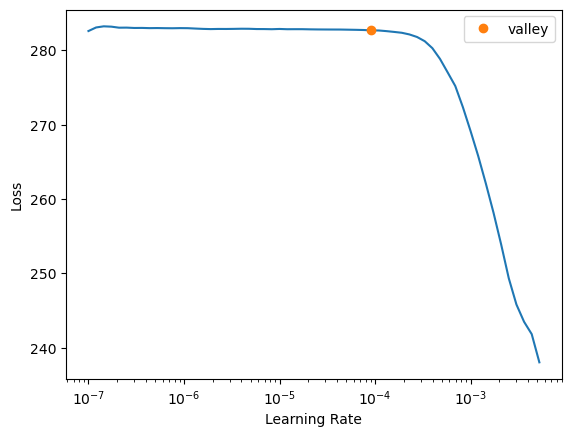

In [3]:
dls = DataLoaders.from_dsets(train_data, val_data, bs = batch_size)
learn = Learner(dls, autoenc, loss_func = F.mse_loss)
lr = learn.lr_find().valley

params_to_optimize = [{'params': autoenc.parameters()}]
optimizer = torch.optim.Adam(params_to_optimize, lr=lr)

epoch,train_loss,valid_loss,time
0,282.787354,284.609741,00:19
1,282.650452,284.384399,00:19
2,282.464325,284.034027,00:19
3,282.146851,283.390076,00:19
4,281.573822,282.064941,00:21
5,280.345245,279.104279,00:19
6,277.607147,272.164978,00:20
7,271.281097,256.352539,00:20
8,257.827057,227.325333,00:20
9,236.219116,195.943680,00:19


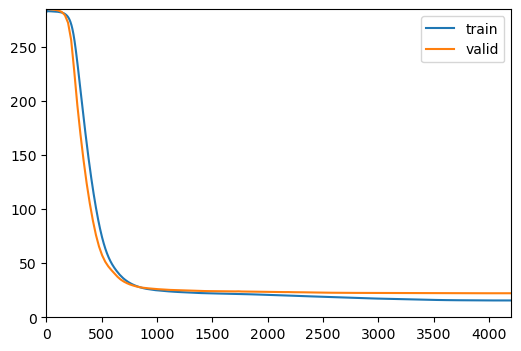

In [4]:
learn.fit_one_cycle(150, lr, cbs=[ShowGraphCallback()])

In [ ]:
#converged around epoch 30 and n_epochs = 35 is gonna be used in optuna